# Efficiency, Explainability and Environmental Sustainability in Wastewater Treatment: A Machine Learning-Based Approach to Cost Management and Effluent Quality

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns

In [6]:
# read the hourly data
import pandas as pd
df_delay_XX_hours = pd.read_pickle('data_Biljana/df_mean_hourly.pkl')


In [7]:
list_hours_shifted = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15']
fname_prefix = 'data_Biljana/df_delay_'
fname_postfix='_hours_result_sim2.pkl'

# read the hourly data

for ii in list_hours_shifted:
    file_name = [fname_prefix + ii + fname_postfix]
    print(file_name)
    
    file_name = df_delay_XX_hours.copy(deep=True)
    file_name = df_delay_XX_hours.copy(deep=True)
    list_names = list(df_delay_XX_hours.columns)
    
    
    list_names = list(df_delay_XX_hours.columns)
    for kk in range(1,int(ii)+1):

        shift_no = str(kk)
        df_shift = df_delay_XX_hours.shift(kk)

        # Rename shifted columns
        list_names_new = list(df_delay_XX_hours.columns)
        #print(ii, len(list_names_new))
        iter = len(list_names_new)
        for jj in range(0,iter):
            list_names_new[jj] = list_names[jj]+shift_no
                #print(list_names_new[jj])
            #print(ii, len(list_names))
        df_shift.columns = list_names_new

            # concatenate the shifted inputs
        file_name = pd.concat([file_name, df_shift], axis=1)
        
        
    file_name.dropna(inplace=True)
    file_name.to_pickle(fname_prefix + ii + fname_postfix)

['data_Biljana/df_delay_1_hours_result_sim2.pkl']
['data_Biljana/df_delay_2_hours_result_sim2.pkl']
['data_Biljana/df_delay_3_hours_result_sim2.pkl']
['data_Biljana/df_delay_4_hours_result_sim2.pkl']
['data_Biljana/df_delay_5_hours_result_sim2.pkl']
['data_Biljana/df_delay_6_hours_result_sim2.pkl']
['data_Biljana/df_delay_7_hours_result_sim2.pkl']
['data_Biljana/df_delay_8_hours_result_sim2.pkl']
['data_Biljana/df_delay_9_hours_result_sim2.pkl']
['data_Biljana/df_delay_10_hours_result_sim2.pkl']
['data_Biljana/df_delay_11_hours_result_sim2.pkl']
['data_Biljana/df_delay_12_hours_result_sim2.pkl']
['data_Biljana/df_delay_13_hours_result_sim2.pkl']
['data_Biljana/df_delay_14_hours_result_sim2.pkl']
['data_Biljana/df_delay_15_hours_result_sim2.pkl']


In [10]:
def evaluate(model, X, y):
    
    pred = model.predict(X)
    mae = metrics.mean_absolute_error(y, pred)
    mse = metrics.mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    
    mape = np.mean(np.abs((y - pred) / np.abs(y)))
    
    errors = abs(pred - y)
    mape = 100 * np.mean(errors / y)
    accuracy = 100 - mape
    
    r2= metrics.r2_score(y, pred)
    
    
    return accuracy, mae, mse, rmse, mape, r2

1
test r2: 0.8404290424459474 for kk: 1, var: eqi


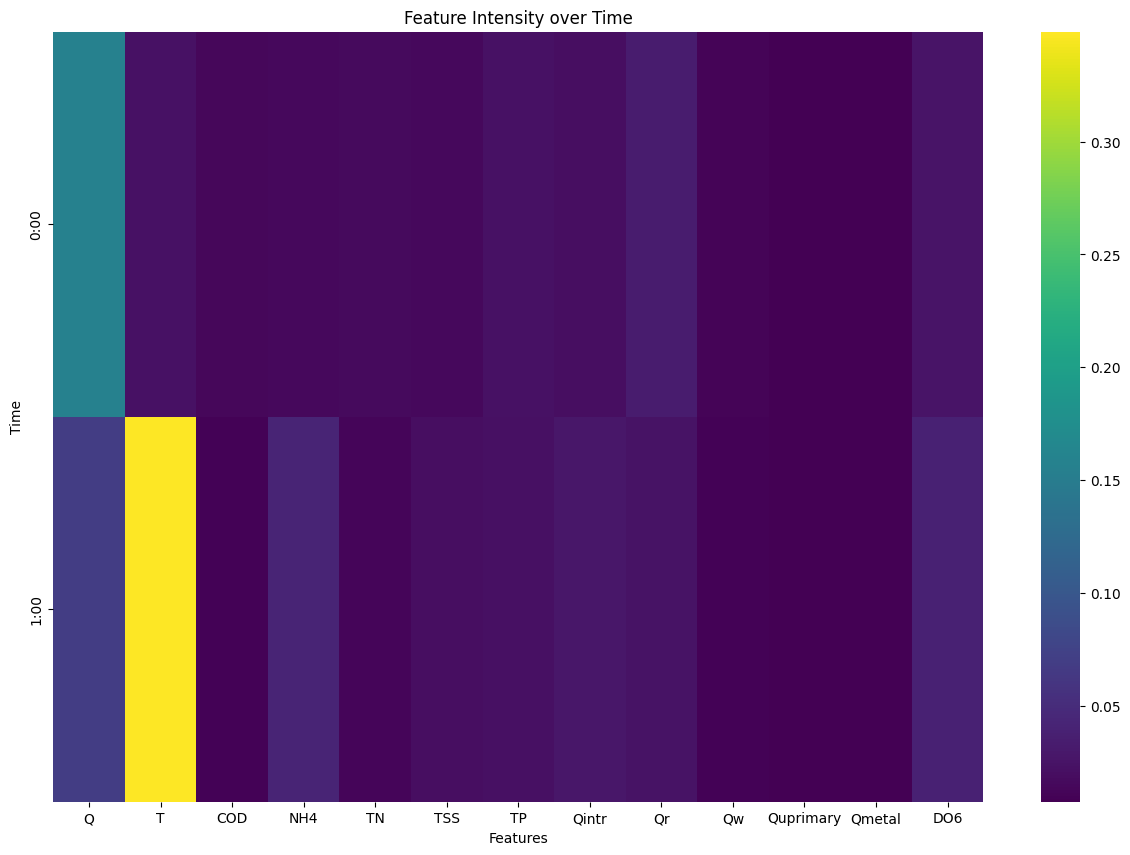

test r2: 0.9533341253180584 for kk: 1, var: oci


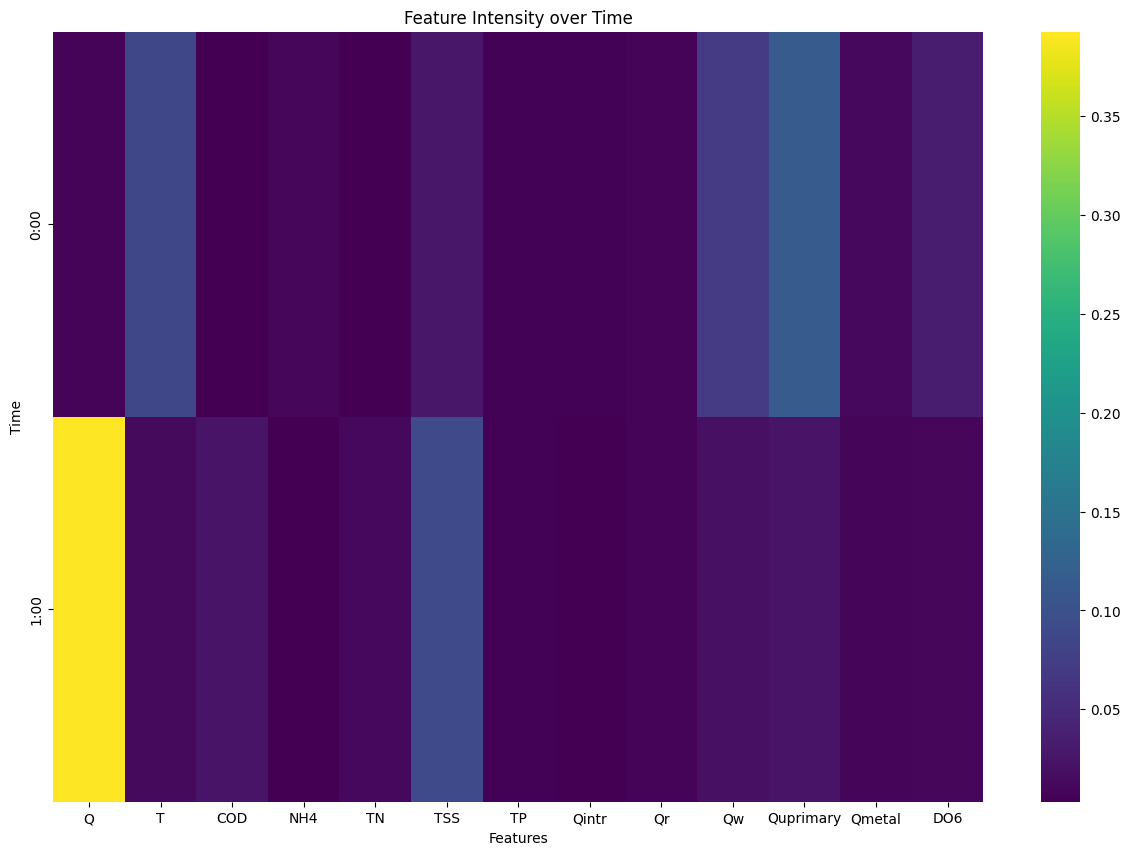

2
test r2: 0.8500360947384201 for kk: 2, var: eqi


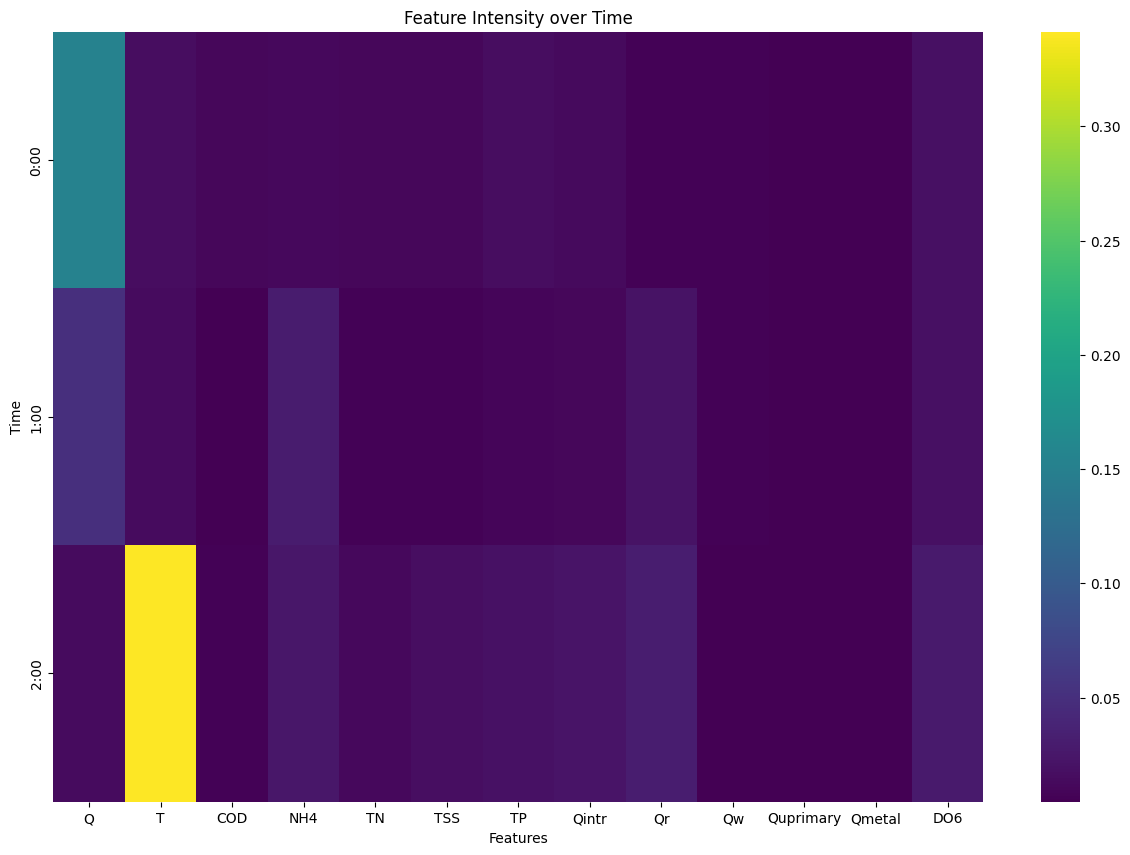

test r2: 0.9586773759582297 for kk: 2, var: oci


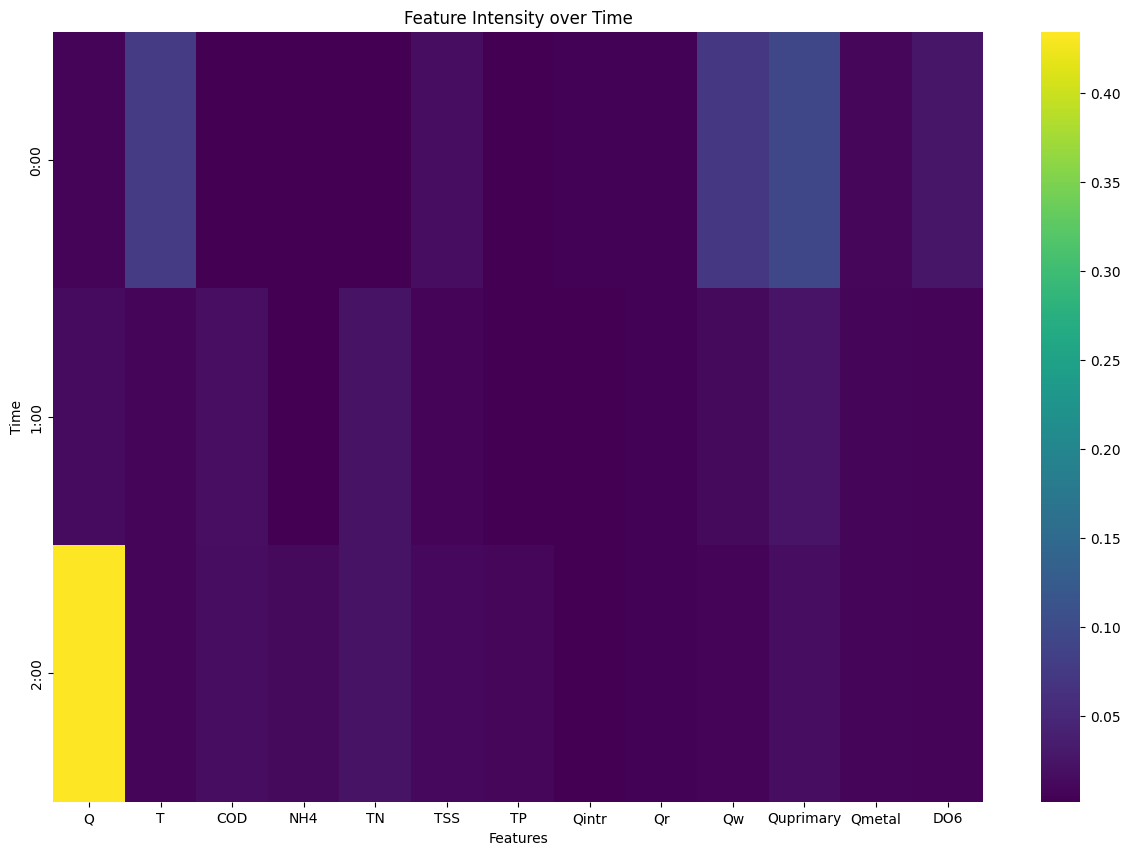

3
test r2: 0.8626596464510046 for kk: 3, var: eqi


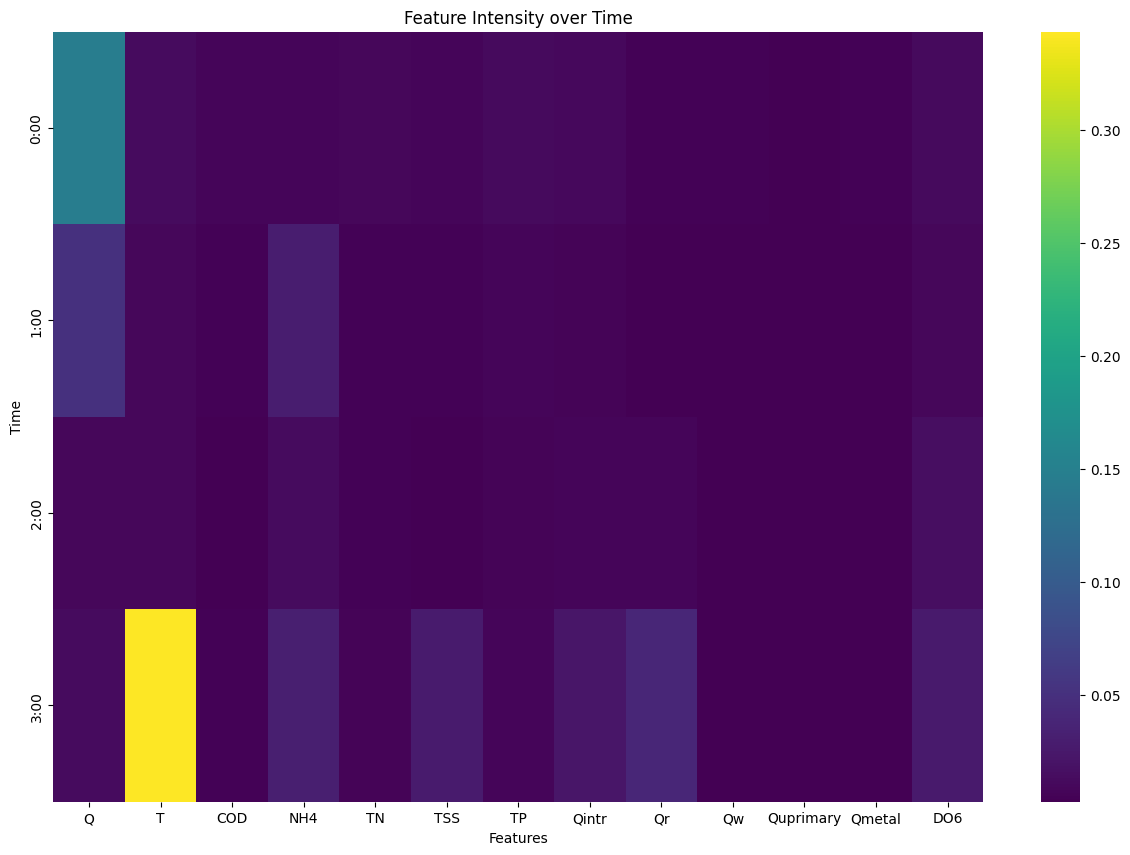

test r2: 0.955617436203983 for kk: 3, var: oci


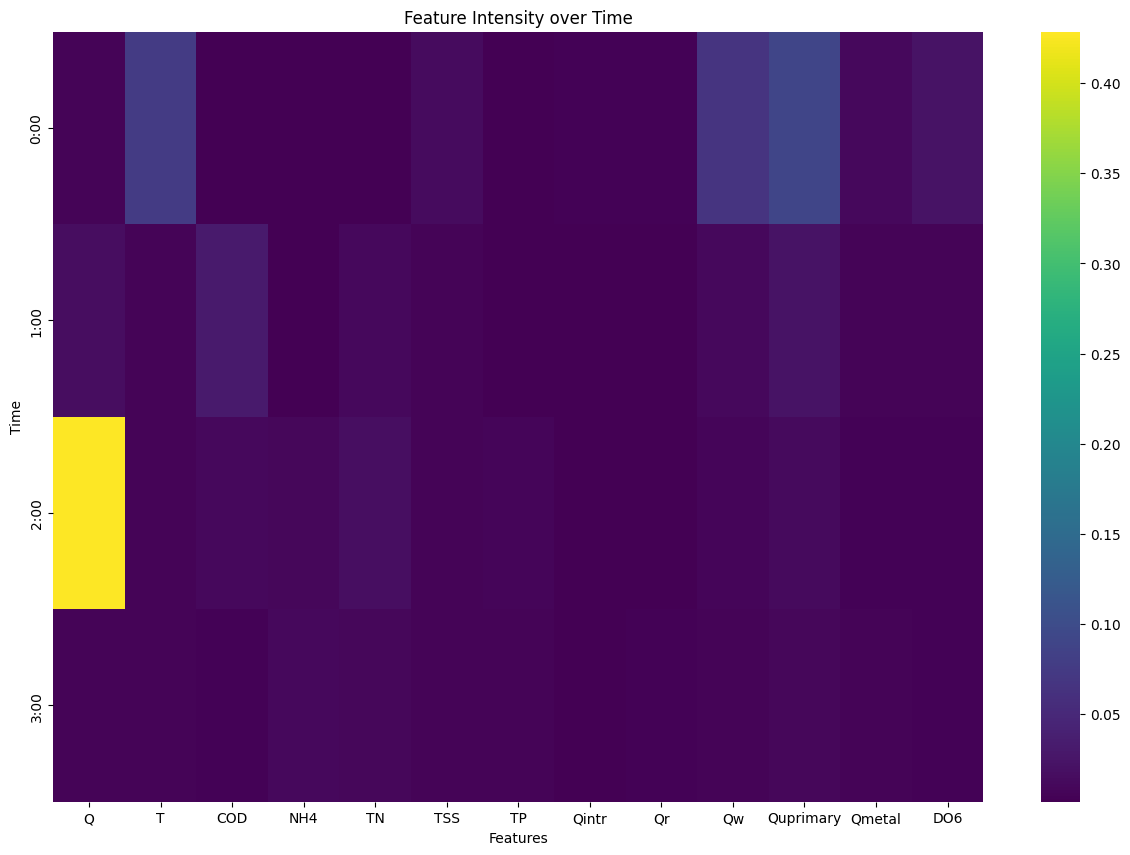

4
test r2: 0.8773986560981583 for kk: 4, var: eqi


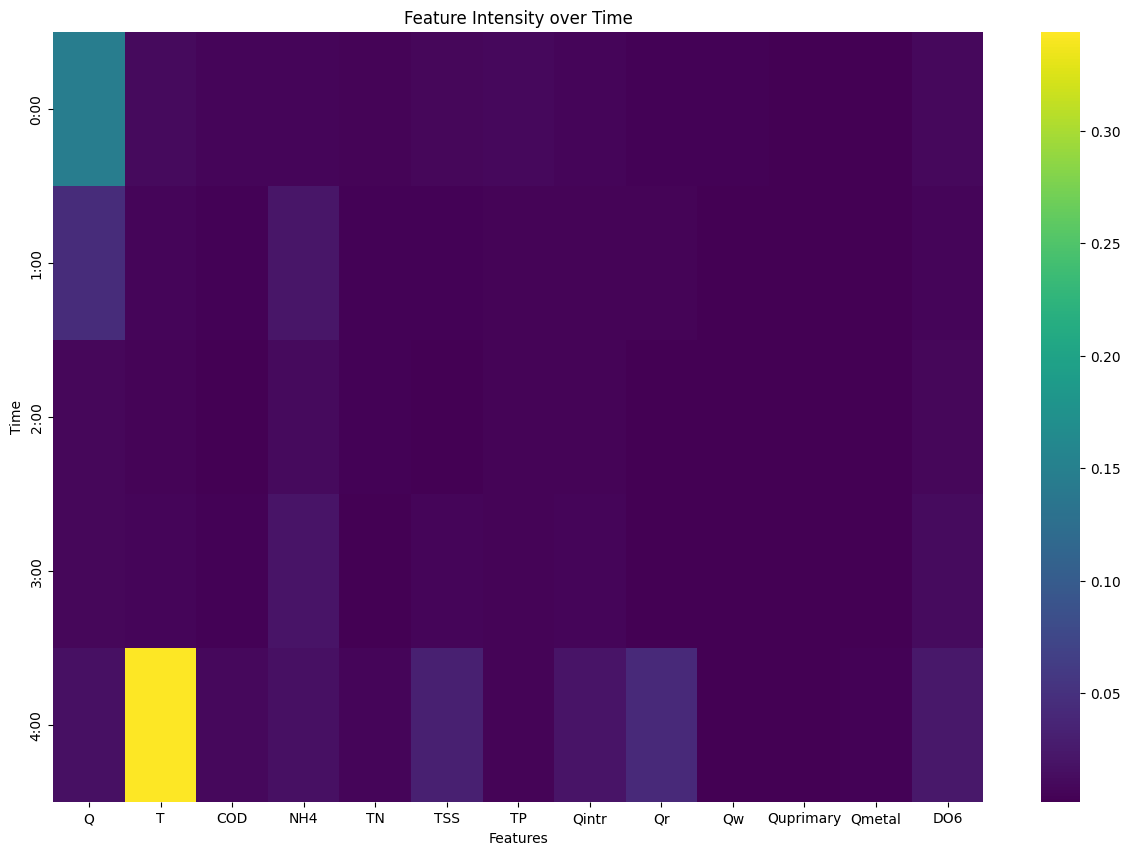

test r2: 0.9553673327571767 for kk: 4, var: oci


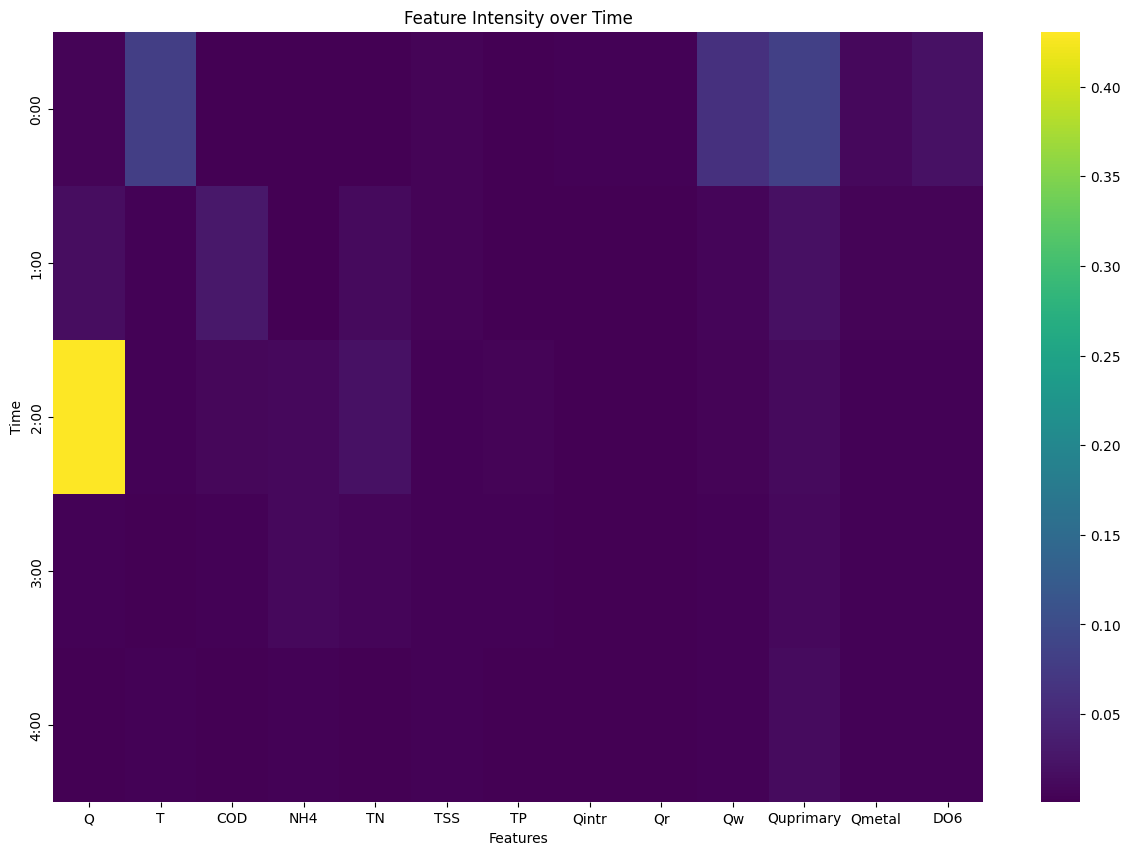

5
test r2: 0.8808906360434298 for kk: 5, var: eqi


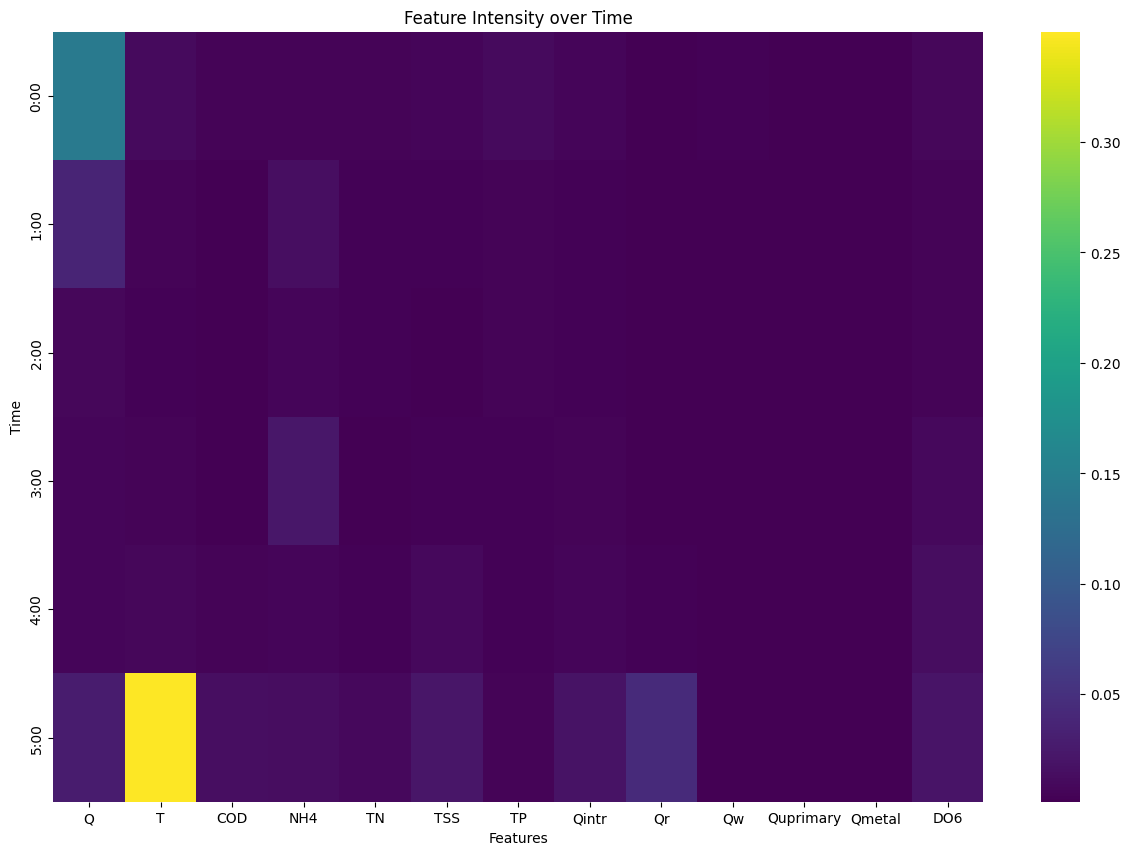

test r2: 0.9584226095698066 for kk: 5, var: oci


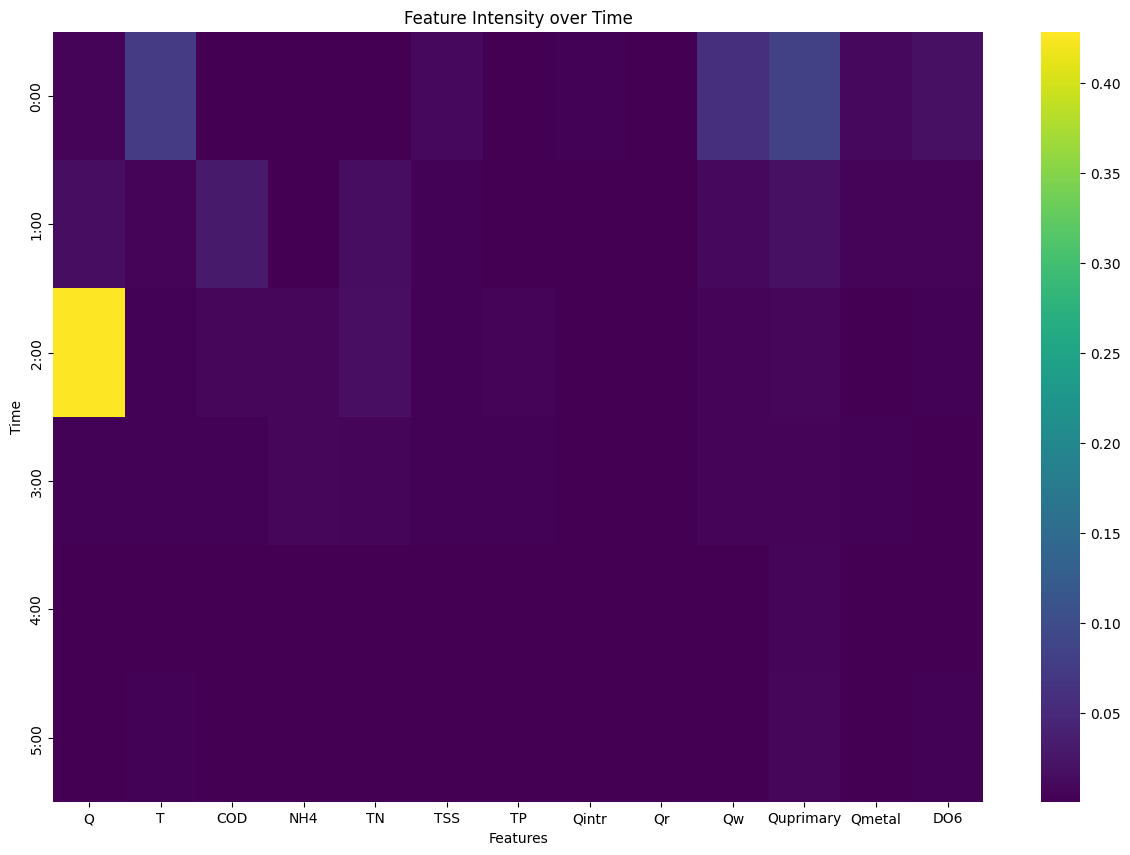

6
test r2: 0.8701283849505006 for kk: 6, var: eqi


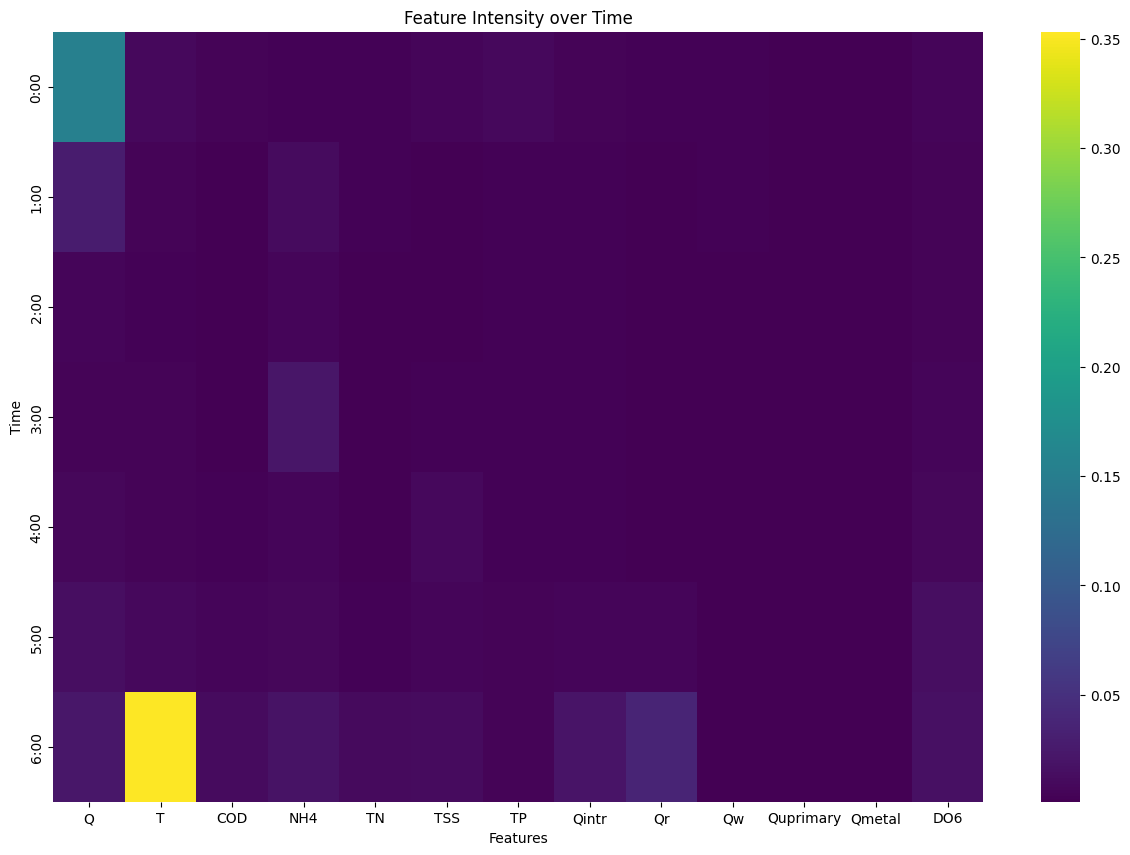

test r2: 0.9544944457180576 for kk: 6, var: oci


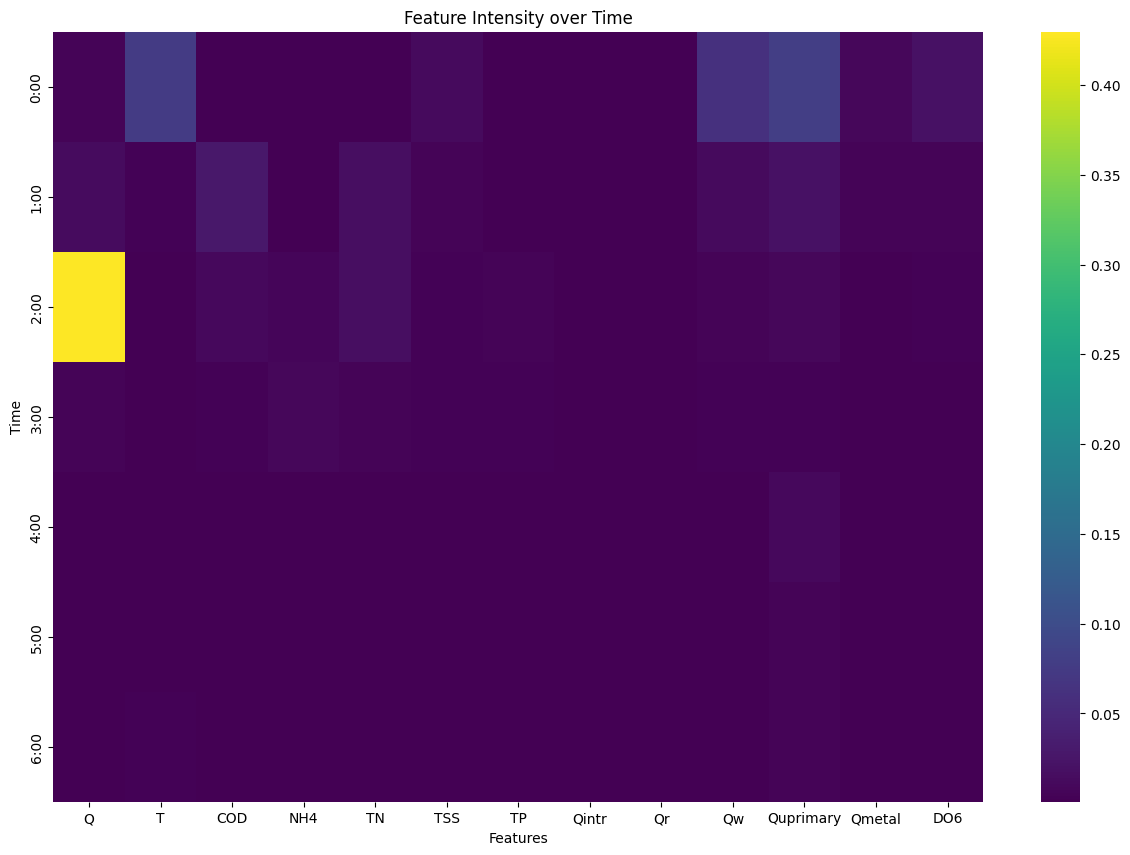

7
test r2: 0.8755760053918334 for kk: 7, var: eqi


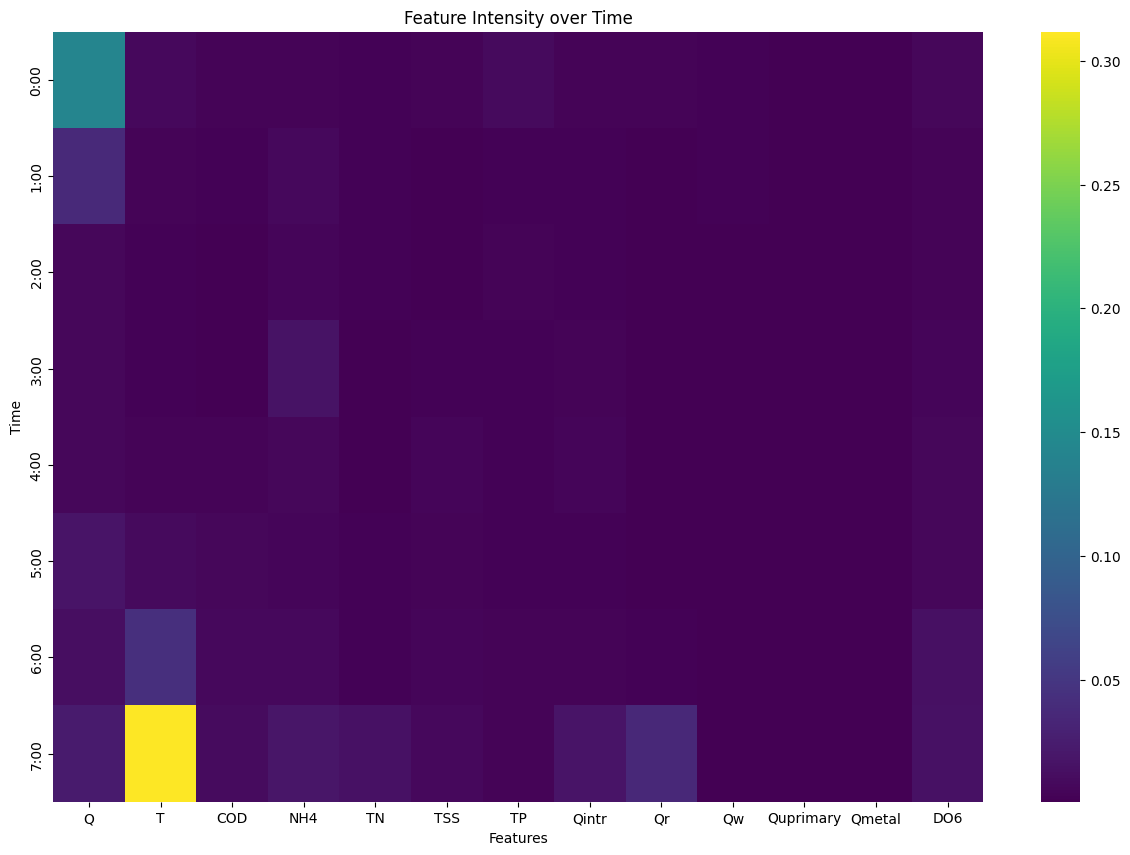

test r2: 0.9563389838594643 for kk: 7, var: oci


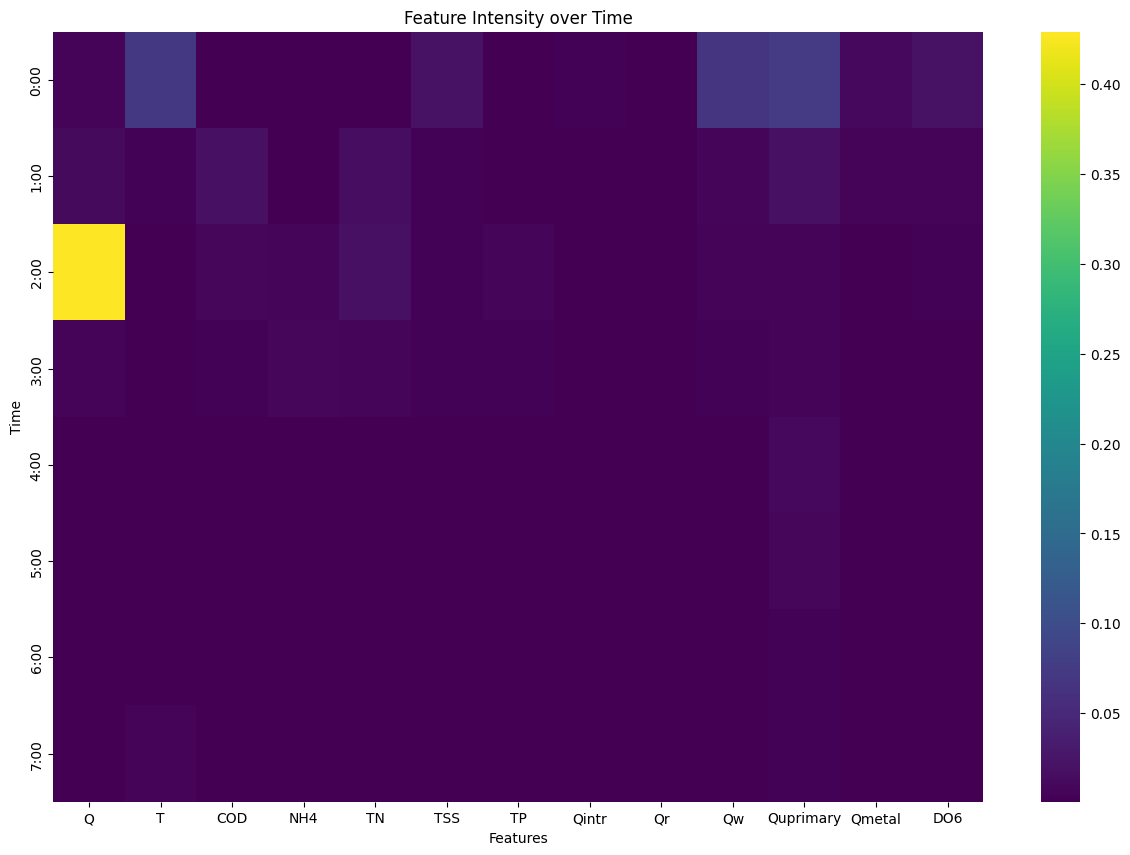

8
test r2: 0.8874534341360524 for kk: 8, var: eqi


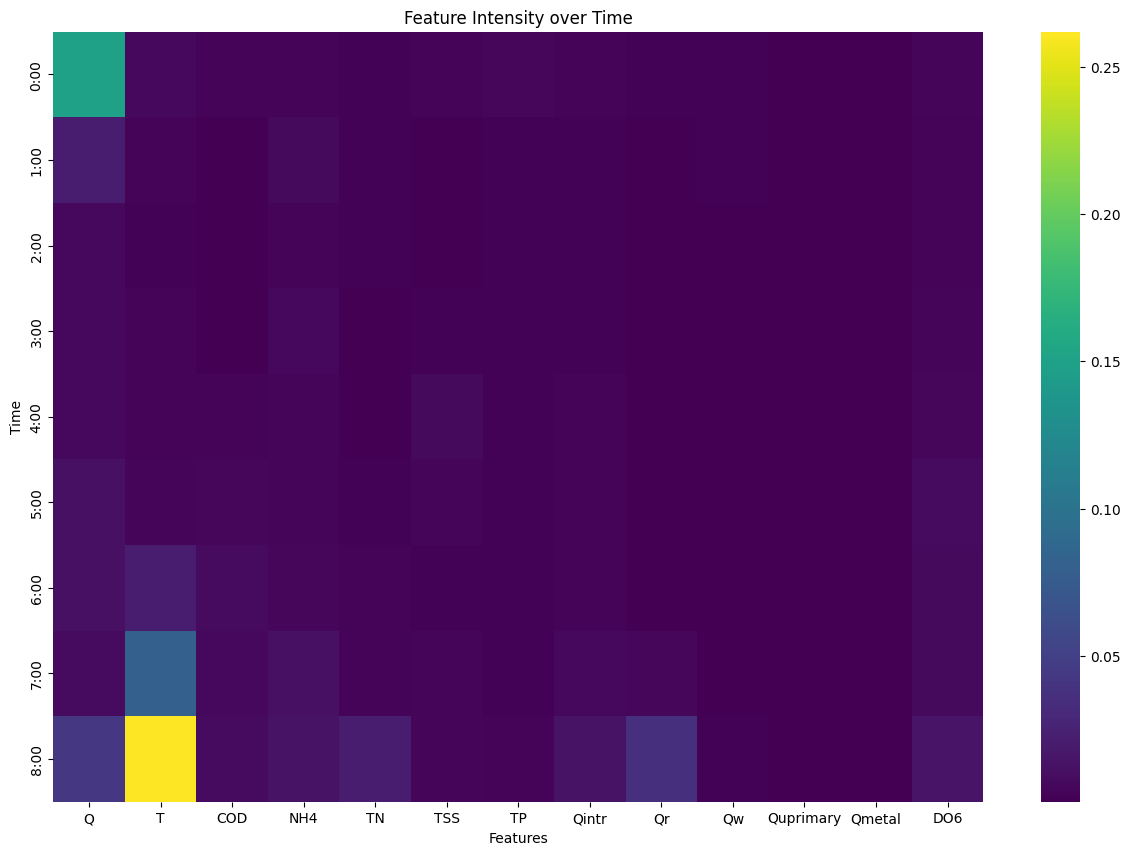

test r2: 0.9504690406604575 for kk: 8, var: oci


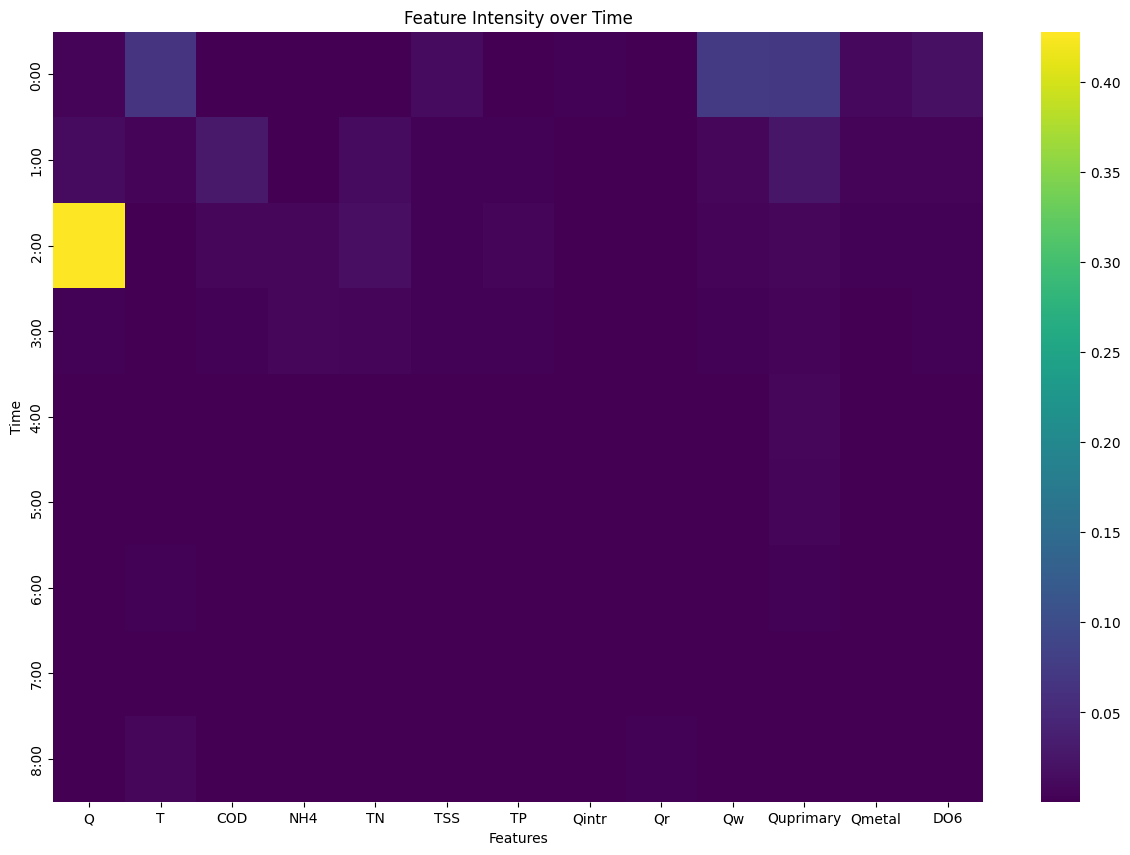

9
test r2: 0.8945453773079296 for kk: 9, var: eqi


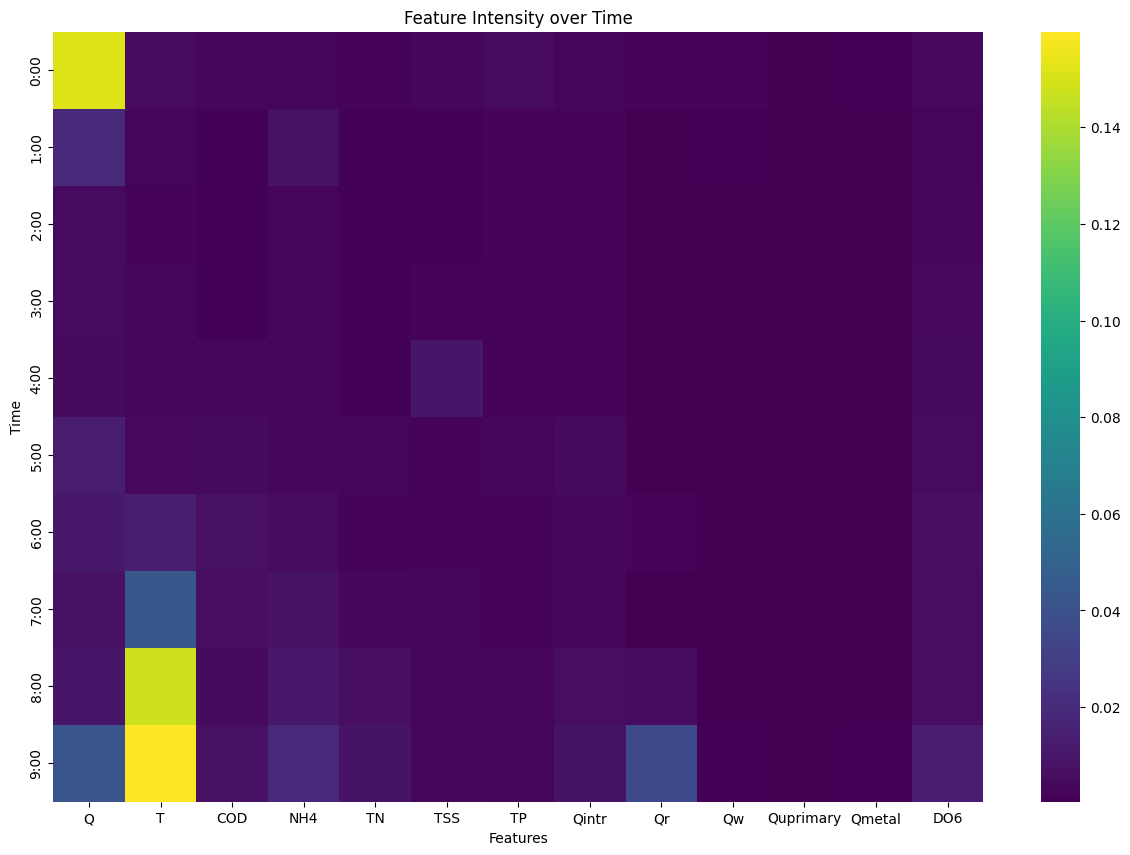

test r2: 0.9511693541265026 for kk: 9, var: oci


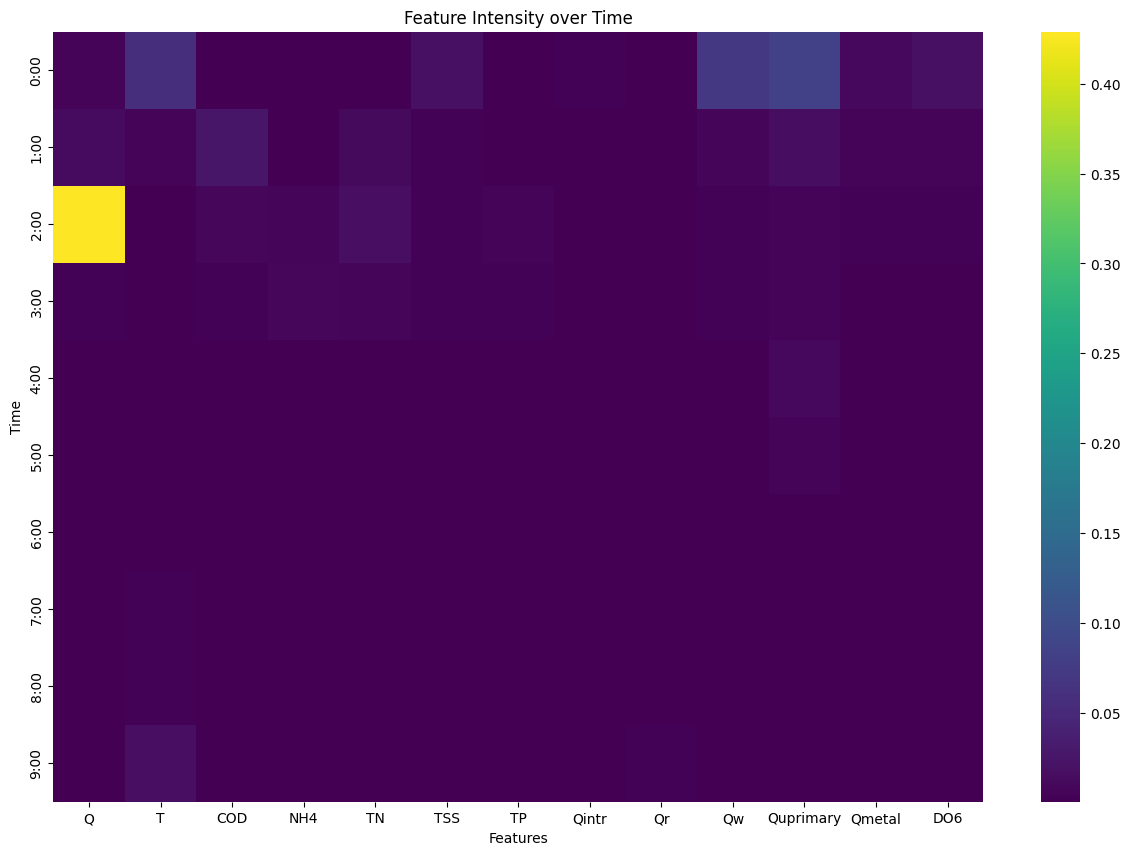

10
test r2: 0.8992172240286072 for kk: 10, var: eqi


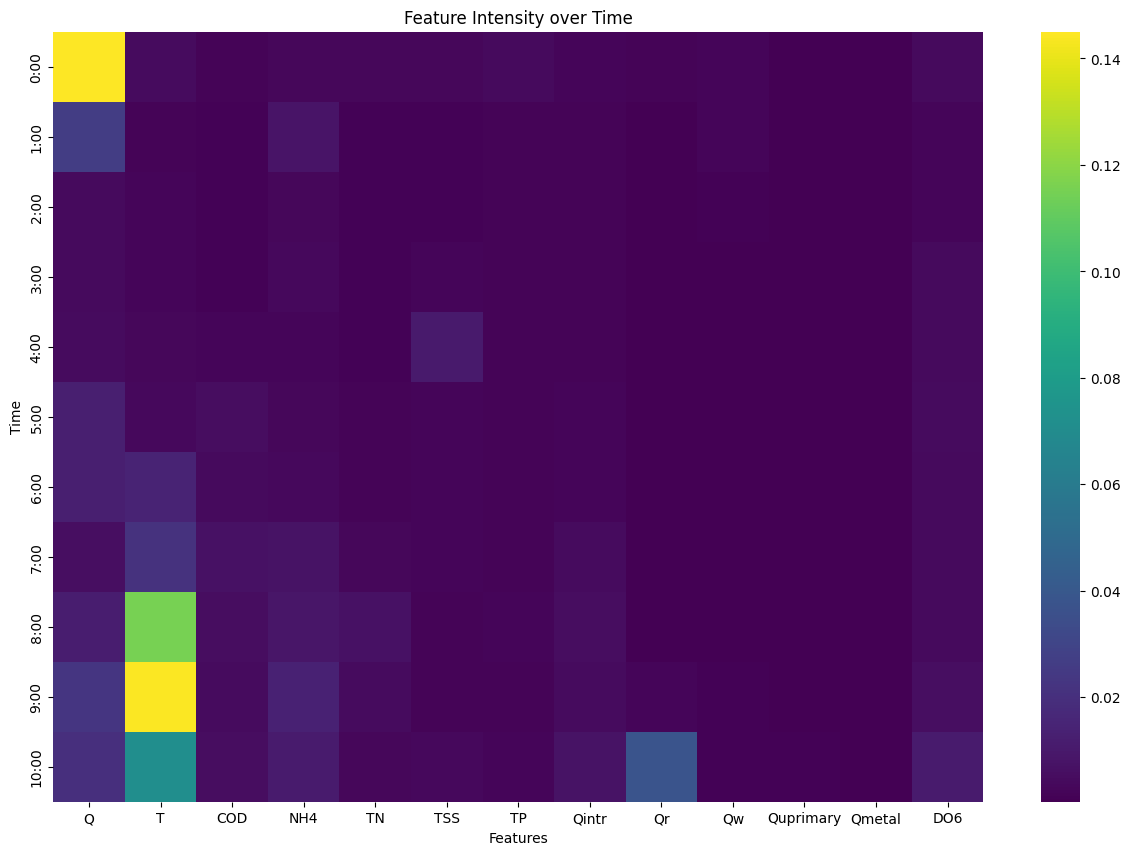

test r2: 0.9497868895287878 for kk: 10, var: oci


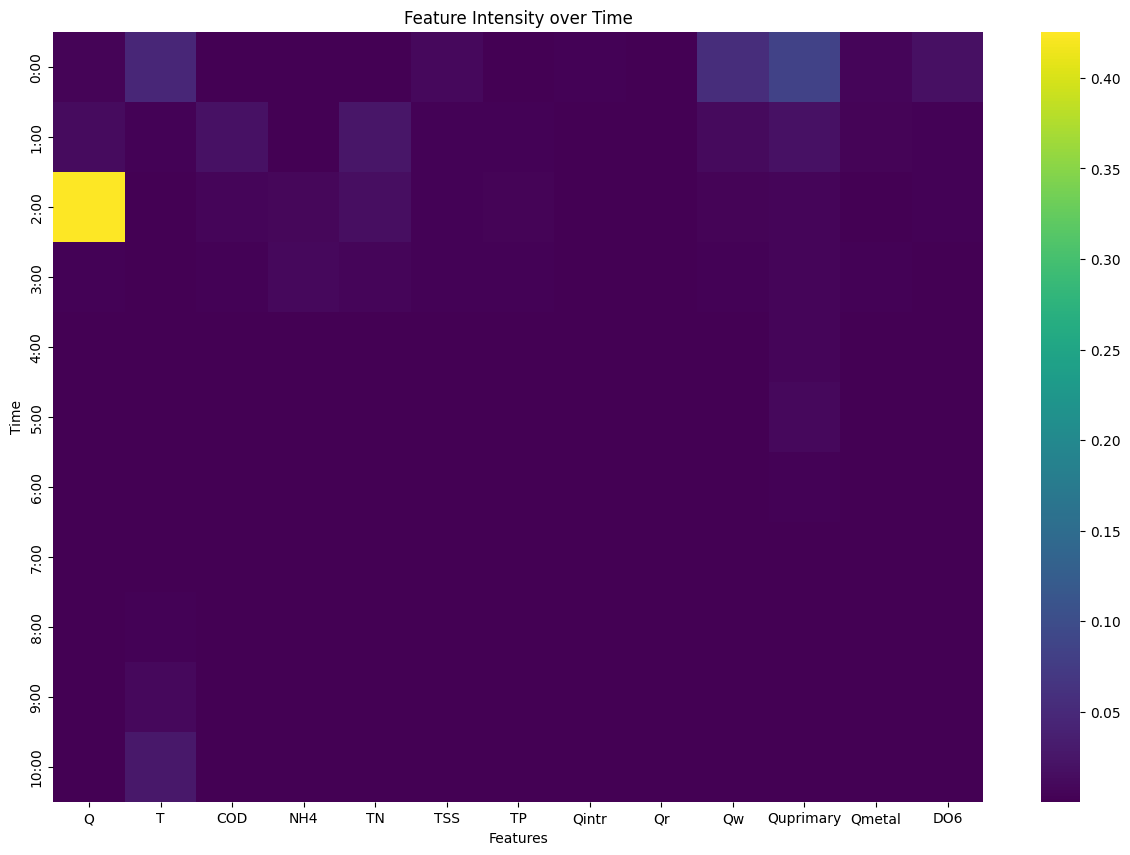

11
test r2: 0.892413189666185 for kk: 11, var: eqi


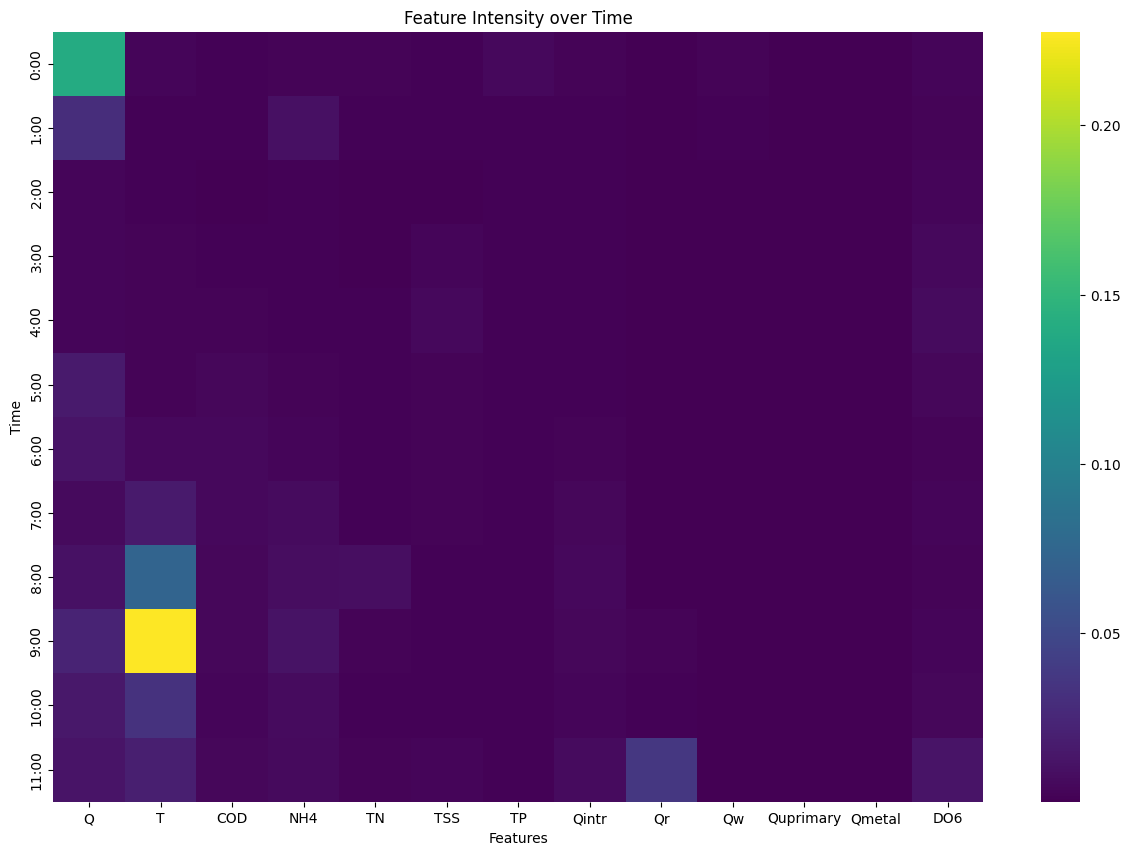

test r2: 0.9470631757701233 for kk: 11, var: oci


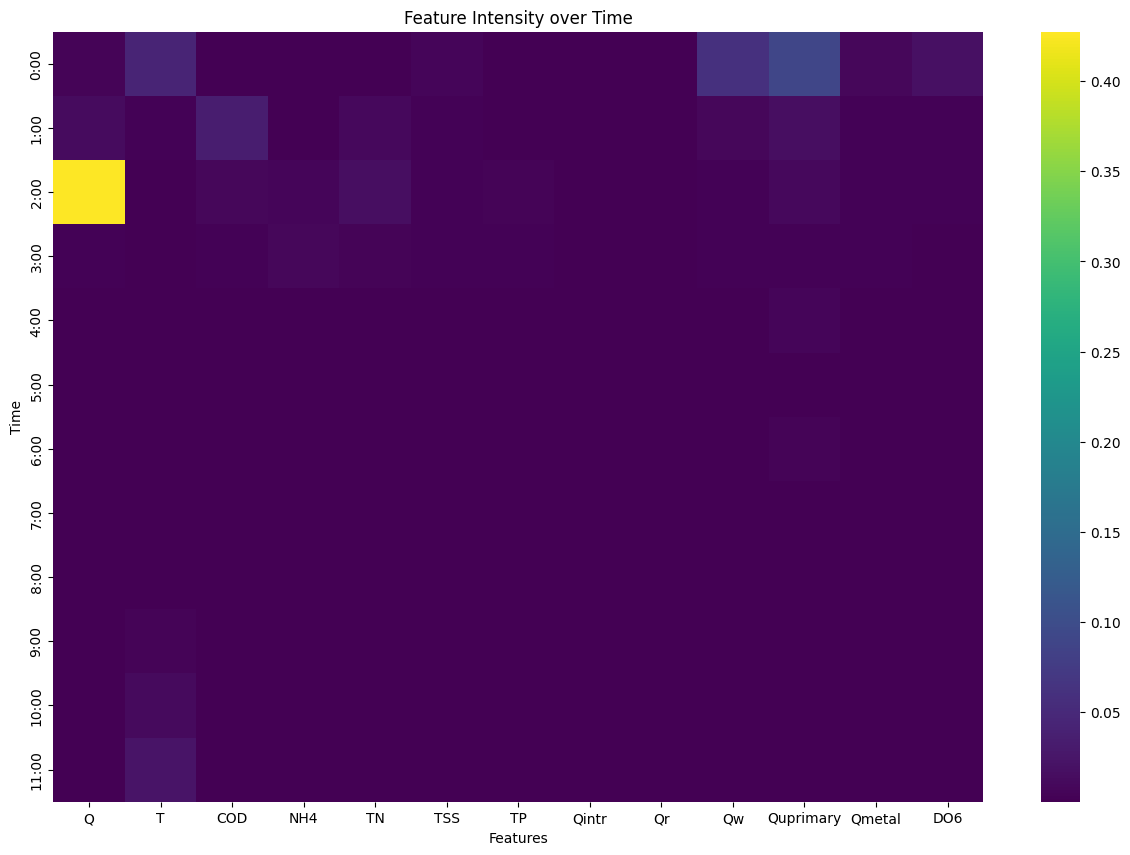

12
test r2: 0.8928393129509157 for kk: 12, var: eqi


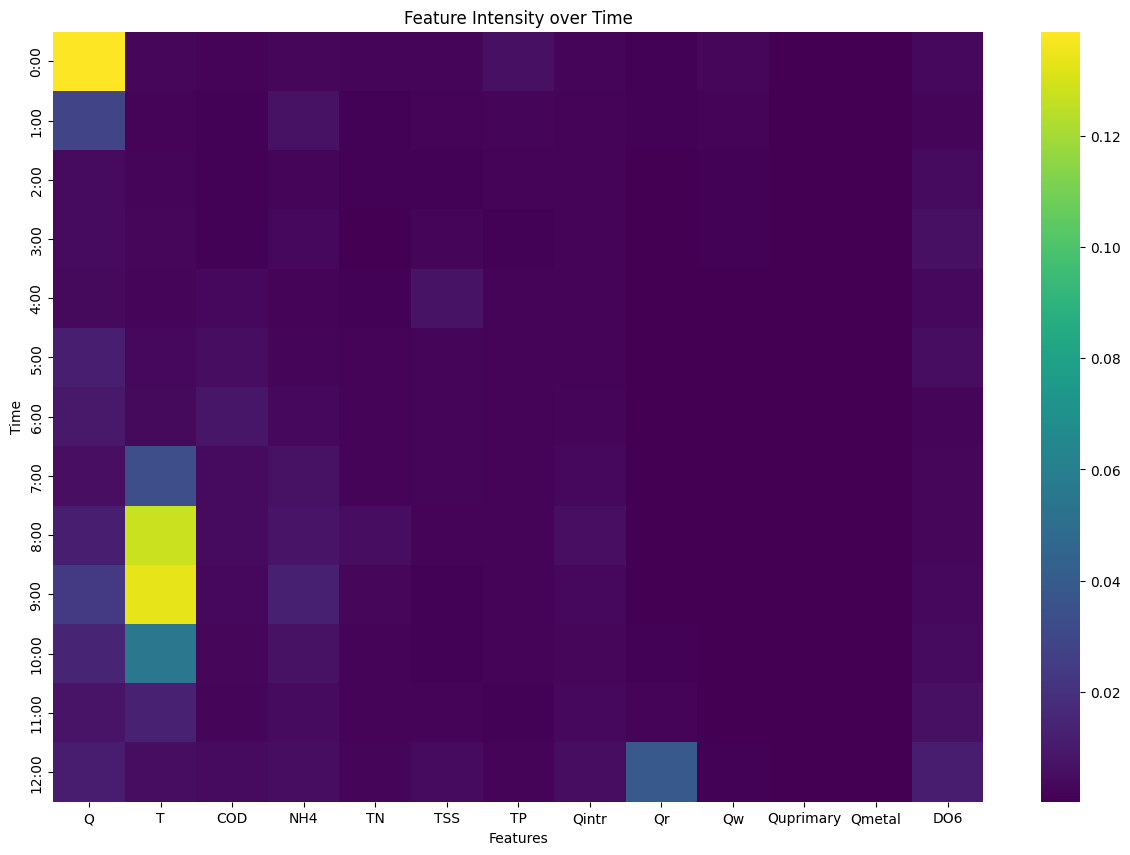

test r2: 0.9497713953268673 for kk: 12, var: oci


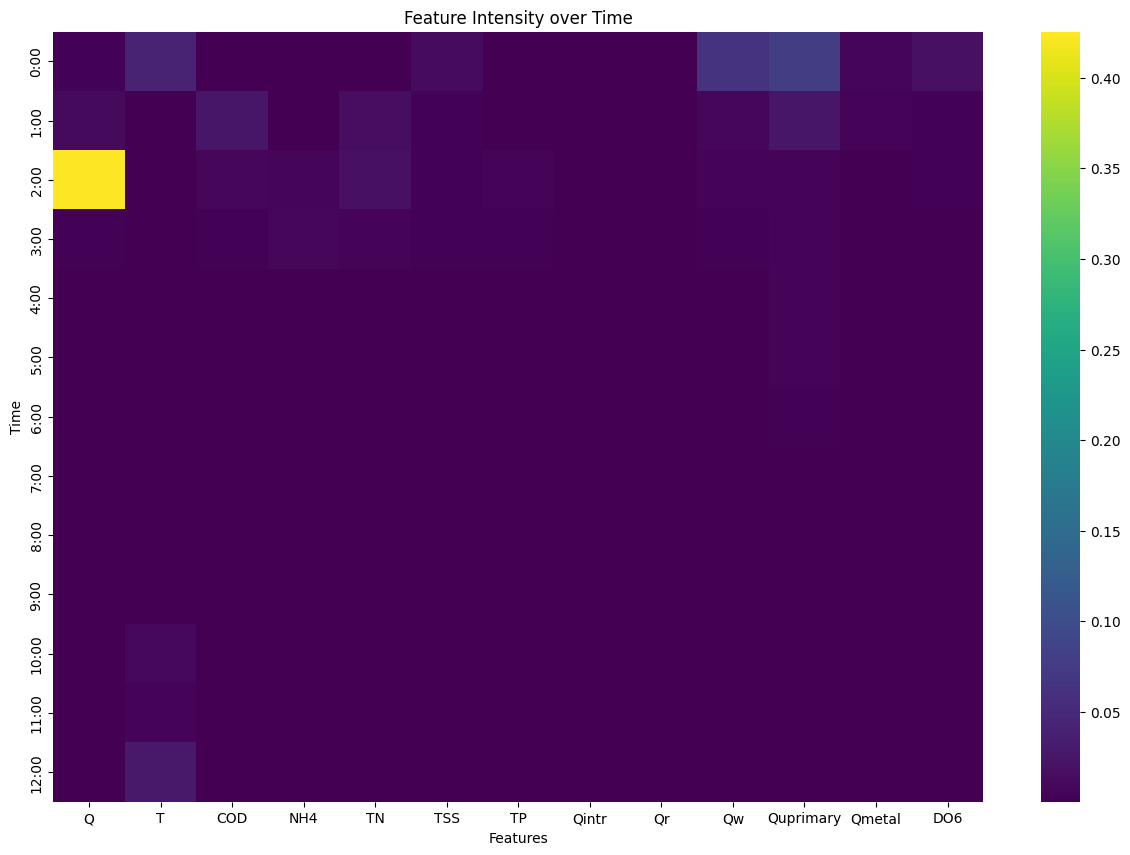

13
test r2: 0.8981603248397091 for kk: 13, var: eqi


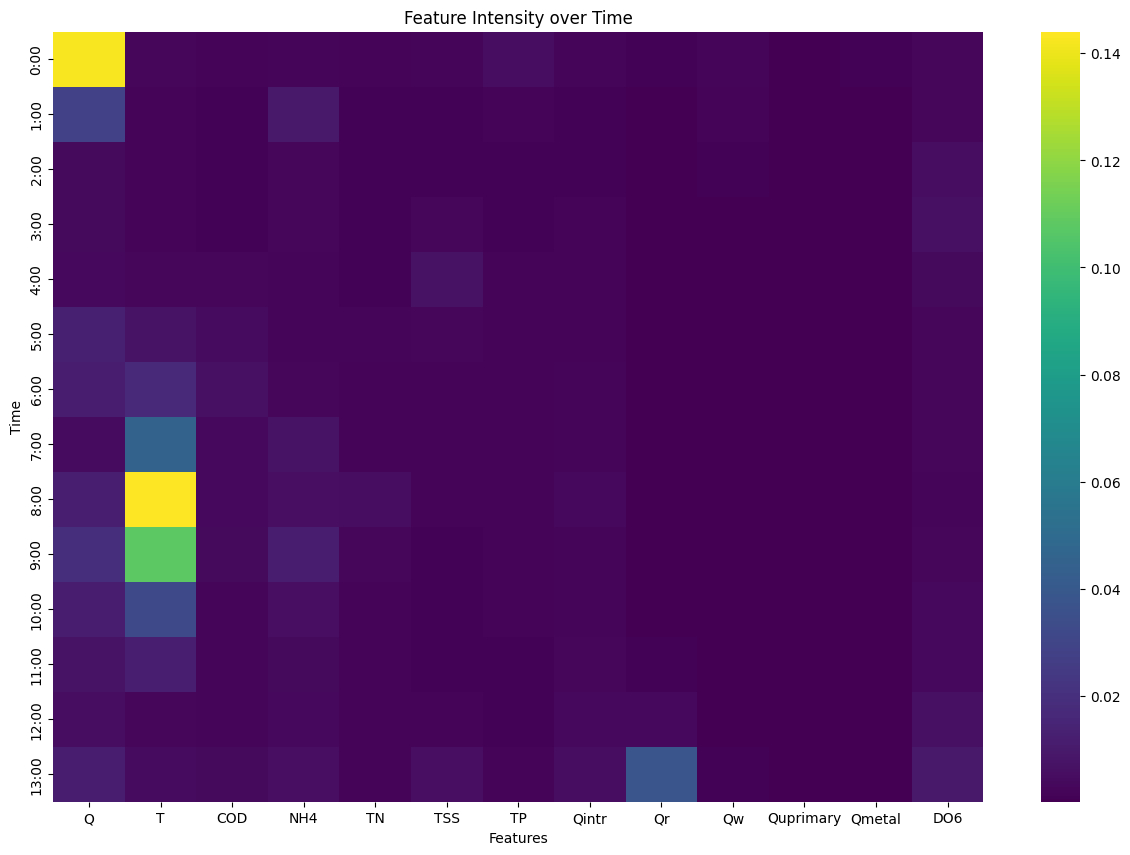

test r2: 0.954575407313768 for kk: 13, var: oci


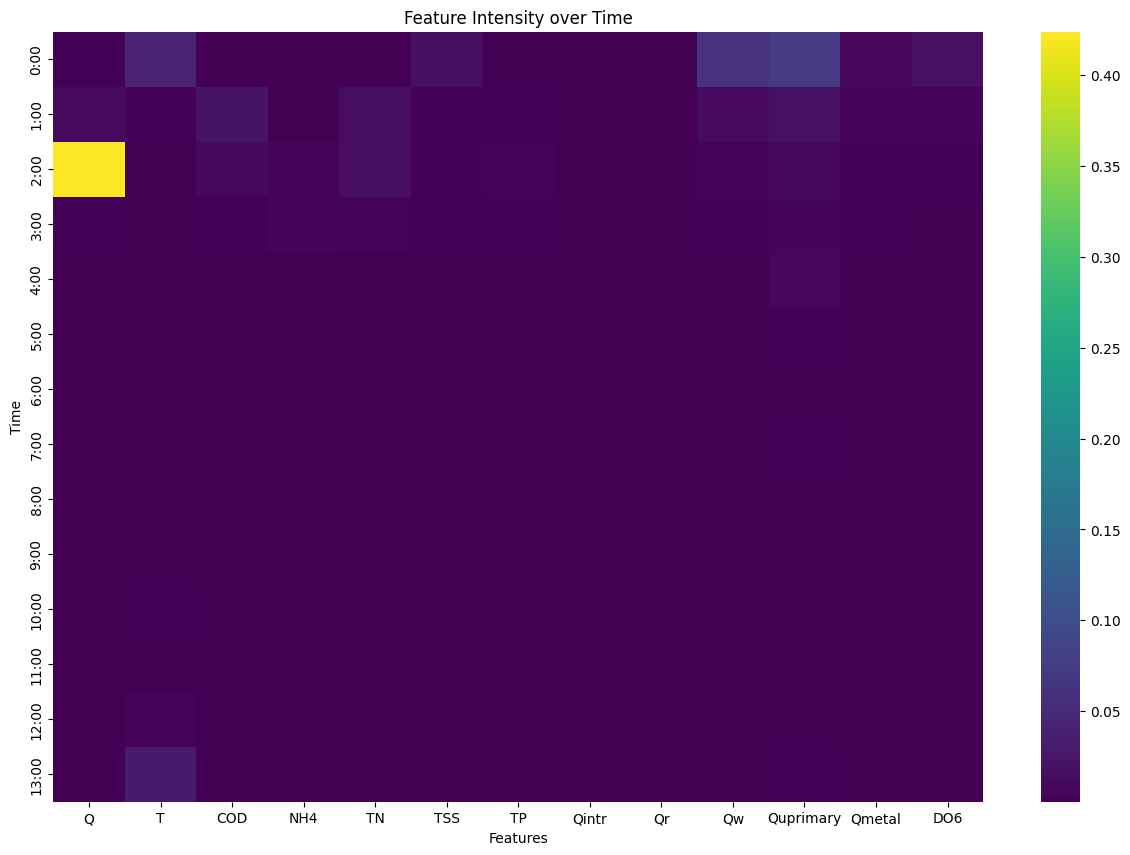

14
test r2: 0.8992186606198643 for kk: 14, var: eqi


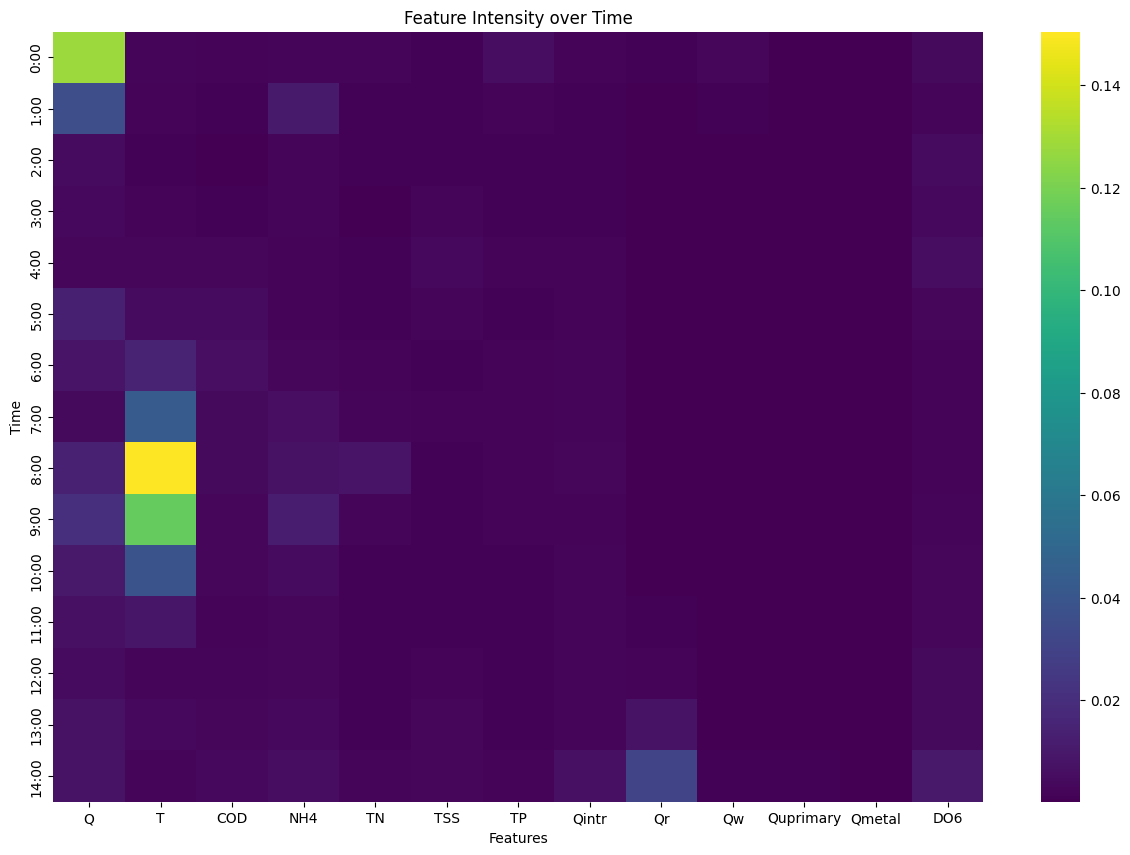

test r2: 0.9532527254075652 for kk: 14, var: oci


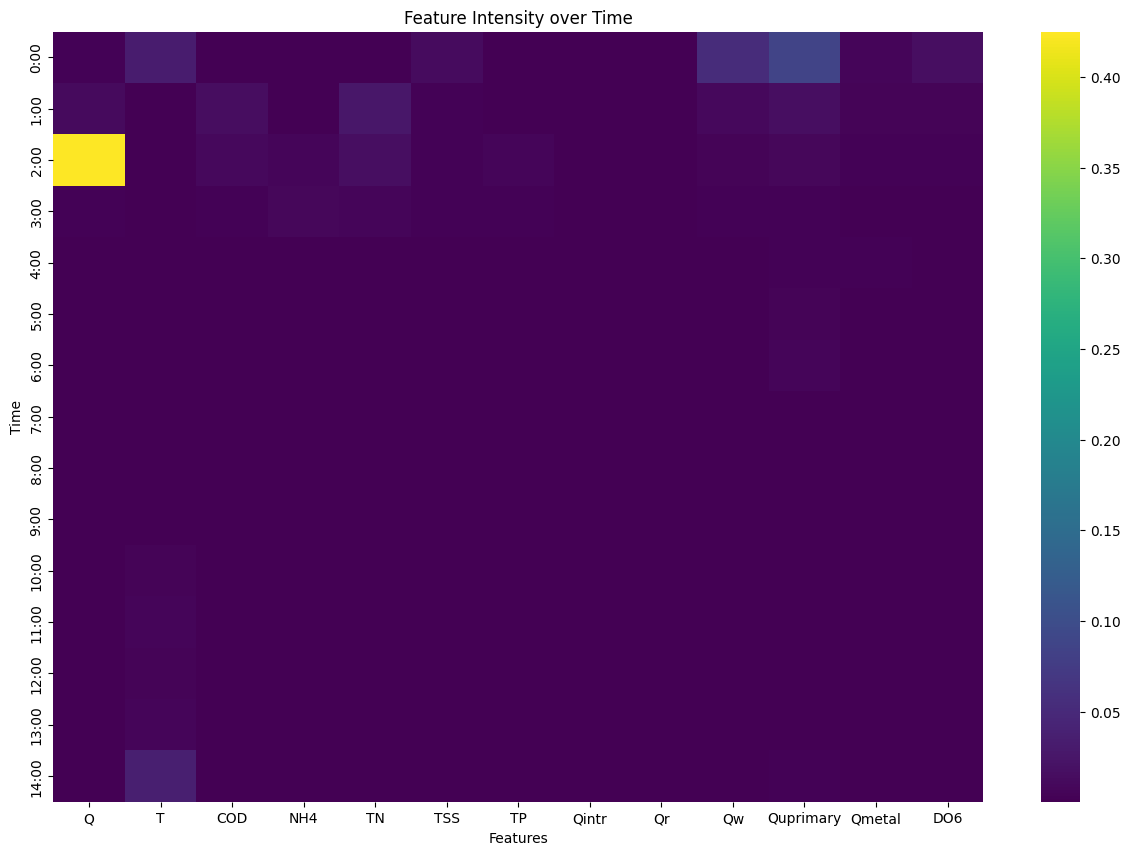

15
test r2: 0.8918800739794158 for kk: 15, var: eqi


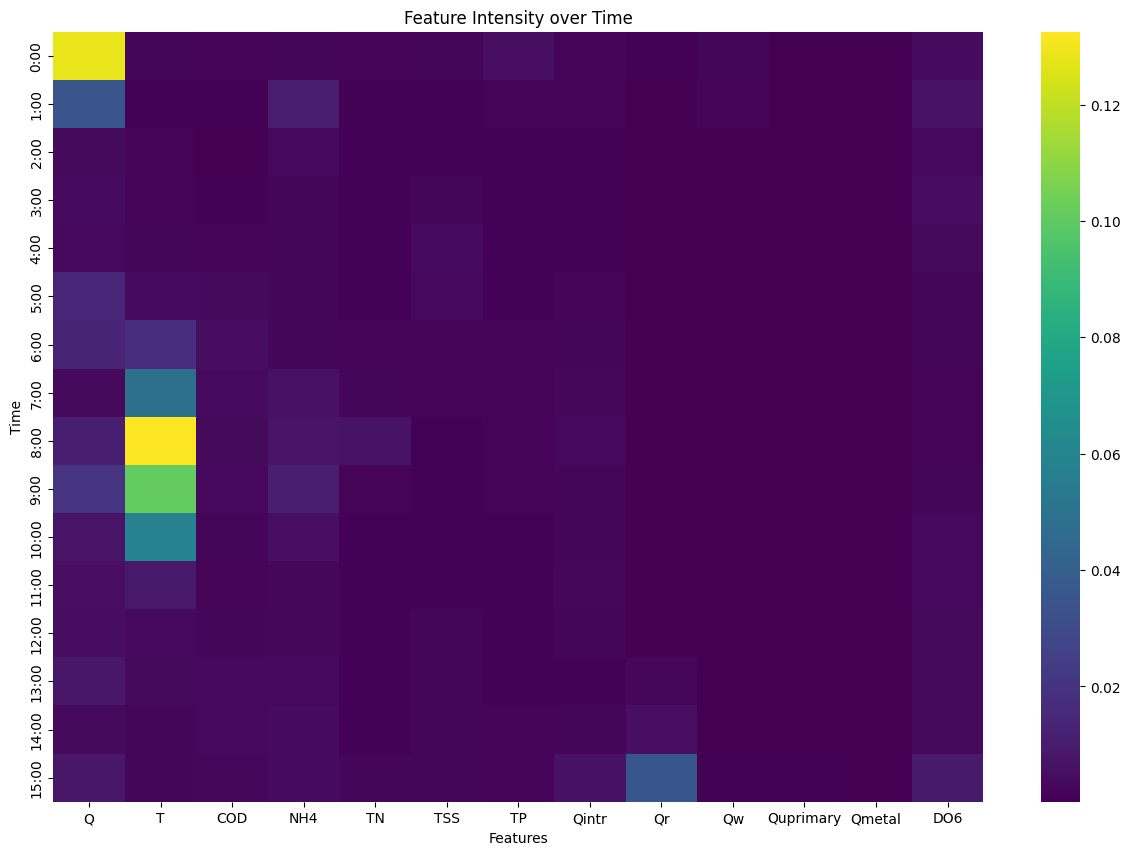

test r2: 0.9541055526593295 for kk: 15, var: oci


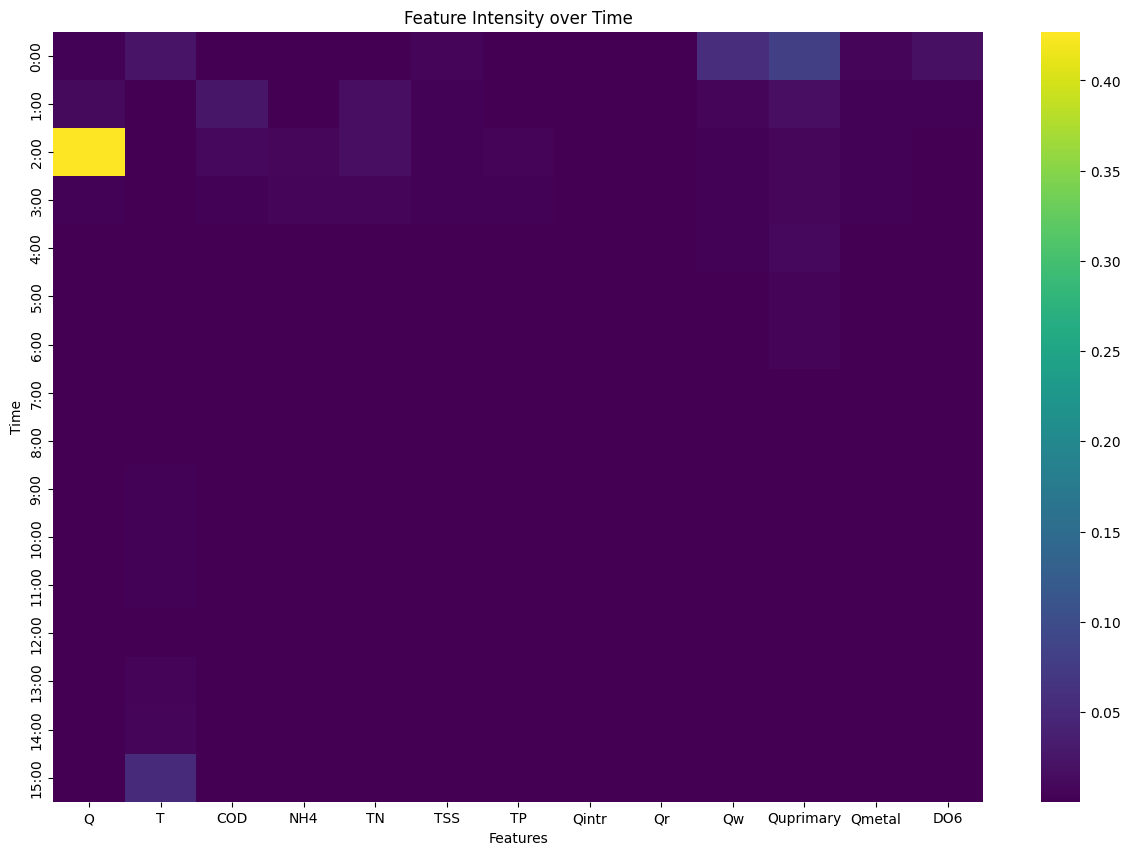

In [17]:
n_features = 13


for kk in list_hours_shifted:
    print(kk)       
    # print results to file
    fname_prefix = 'data_Biljana/df_delay_'
    fname_postfix = '_hours_result_sim2.pkl'
    
    # create the file name and input data
    file_name = fname_prefix + kk + fname_postfix
    df_delay_16_hours_result=pd.read_pickle(file_name)

    # create the output variables
    y_EQI = df_delay_16_hours_result['EQI']
    y_OCI = df_delay_16_hours_result['OCI']
    ys = [(y_EQI, 'eqi'), (y_OCI, 'oci')]

    list_col_drop = ['EQI', 'OCI']
    
    list_names_new = []
    kk_int=int(kk)
    # remove the columns that are not used in the input data file
    for ii in range(0,len(list_col_drop)):
        for jj in range(1,kk_int+1):
            list_names_new.append(list_col_drop[ii]+str(jj))

    X = df_delay_16_hours_result.drop(columns=list_names_new)
    X = X.drop(columns=['EQI', 'OCI'])

    for y_, var in ys:
        X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.1, shuffle=True)

        model = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42, oob_score=True)
        model = model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        test_accuracy, test_mae, test_mse, test_rmse, test_mape, test_r2 = evaluate(model, X_test, y_test)
        print(f"test r2: {test_r2} for kk: {kk}, var: {var}")

        importances = model.feature_importances_

        np.random.seed(0)
        data = importances.reshape(int(kk)+1, n_features)

        # Create time and feature labels for the axes
        time_labels = [f"{i}:00" for i in range(data.shape[0])]
        feature_labels = [f"{feature}" for feature in X_train.columns[:n_features]]

        # Create the heatmap
        plt.figure(figsize=(15, 10))
        sns.heatmap(data, annot=False, fmt=".2f", xticklabels=feature_labels, yticklabels=time_labels, cmap="viridis")

        # Adding titles and labels
        plt.title("Feature Intensity over Time")
        plt.xlabel("Features")
        plt.ylabel("Time")

        # Show the plot
        plt.show()